In [2]:
import numpy as np
import pandas as pd

import os

import time
from tqdm import tqdm

import tree
import model
import find_tree_indexes

import yaml
import lal

In [3]:
DATA_PATH = '../../Data/InputData/'

# Work with Bertone catalog

## Check what happens with Millennium masses

In [4]:
data_bertone_millenium = pd.read_csv(DATA_PATH + 'sel_starting_ordered_bertone.csv')

In [6]:
data_bertone_millenium.keys()

Index(['galaxyId', 'lastProgenitorId', 'snapnum', 'descendantId', 'P1_Id',
       'P2_Id', 'D_z', 'D_mass', 'D_bulge', 'sfr', 'sfr_bulge', 'D_BH', 'P1_z',
       'P2_z', 'M1', 'M2', 'P1_bulge', 'P2_bulge', 'P1_stars', 'P2_stars',
       'M_cold', 'M_hot', 'V_vir', 'P1_M_cold', 'P1_M_hot', 'P1_V_vir',
       'P2_M_cold', 'P2_M_hot', 'P2_V_vir'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt

In [10]:
h = 0.67
mass_conv = 10**8/h

### Plot Kormendy and Ho mass scaling

In [14]:
import bh_mass_model

In [19]:
def kh_mean(mass_bulge):
    return 10**(8.69 + 1.17 * np.log10(mass_bulge / 10**(11)))

In [20]:
def kh_upper(mass_bulge):
    return 10**(8.69 + 1.17 * np.log10(mass_bulge / 10**(11)) + 0.28)

In [21]:
def kh_lower(mass_bulge):
    return 10**(8.69 + 1.17 * np.log10(mass_bulge / 10**(11)) - 0.28)

In [23]:
bulge_masses = np.logspace(6, 11, 1000)
bh_masses_mean = kh_mean(bulge_masses)
bh_masses_upper = kh_upper(bulge_masses)
bh_masses_lower = kh_lower(bulge_masses)

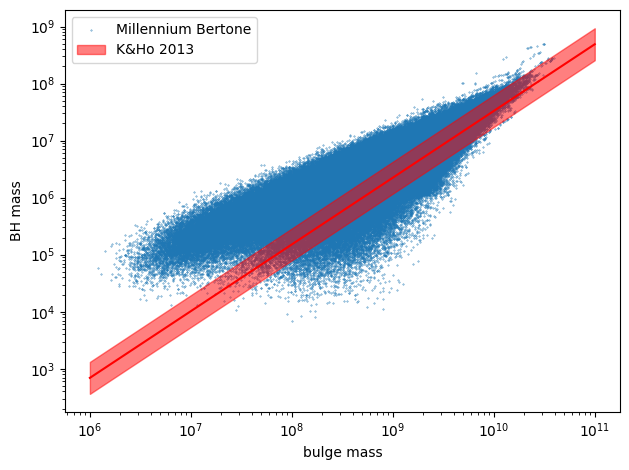

In [35]:
plt.scatter(data_bertone_millenium['D_bulge']*mass_conv, data_bertone_millenium['D_BH']*mass_conv,  s=0.1, label = 'Millennium Bertone')
plt.plot(bulge_masses, bh_masses_mean, c='r')
plt.fill_between(bulge_masses, bh_masses_lower, bh_masses_upper,
                 color = 'red', alpha = 0.5, label = 'K&Ho 2013')
#plt.plot(bulge_masses, bh_masses_upper, c='r', ls='--')
#plt.plot(bulge_masses, bh_masses_lower, c='r', ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('bulge mass')
plt.ylabel('BH mass')
plt.legend()
plt.tight_layout()
plt.show()

## Calculate h_1yr with Millennium masses